<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/Th%E1%BB%B1c_h%C3%A0nh_ki%E1%BB%83m_%C4%91%E1%BB%8Bnh_t%C6%B0%C6%A1ng_quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Thực hành] Kiểm định tương quan trên dữ liệu Food Price in Turkey**

In [1]:
# Khai báo thư viện
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# đọc dữ liệu
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31021019/FoodPrice_in_Turkey.csv")
# lọc dữ liệu gạo bán lẻ (Rice - Retail) ở National Average
df_rice = df[(df.ProductName == "Rice - Retail") & ( df.Place == "National Average")]
print("kích thước bộ dữ liệu: " ,df_rice.shape)
print ("mô tả bộ dữ liệu")
df_rice.describe()

kích thước bộ dữ liệu:  (66, 8)
mô tả bộ dữ liệu


,ProductId,UmId,Month,Year,Price
count,66.0,66.0,66.000000,66.000000,66.000000
mean,52.0,5.0,6.454545,2016.257576,7.084923
std,0.0,0.0,3.561252,1.947864,1.417041
min,52.0,5.0,1.000000,2013.000000,4.492000
25%,52.0,5.0,3.000000,2015.000000,6.117500
50%,52.0,5.0,6.000000,2016.000000,6.523500
75%,52.0,5.0,9.750000,2018.000000,8.401025
max,52.0,5.0,12.000000,2019.000000,9.561600


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


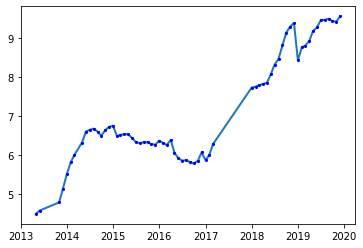

In [3]:
# vẽ mối hiên hệ giữa thời gian và giá gạo
df_rice['time'] =  pd.to_datetime(df_rice['Year'].astype(str) + '/'+df_rice['Month'].astype(str))
plt.plot(df_rice['time'], df_rice['Price'], linewidth = 2, marker = '*', markersize=2, markerfacecolor='red', markeredgecolor = 'blue', markeredgewidth=2)
plt.show()

Tiến hành kiểm định

<li>Do thời gian nhận giá trị tăng dần nên có thể được coi là một biến định lượng
<li>Thực hiện kiểm định pearson để tiến hành kiểm định mối liên hệ giữa hai biến thời gian và giá
<li>Biên đổi thời gian về dạng định lượng như sau: lấy mốc 1/2013 là mốc 1 tương đối, 1 tháng sẽ được tính là một đơn vị thời gian

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


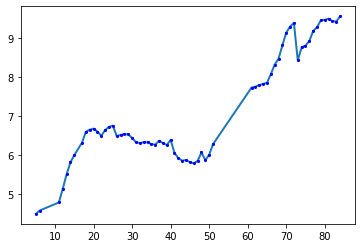

In [4]:
# Biến đổi thời gian
df_rice['time_processed'] = df_rice.Month + (df_rice.Year -2013)*12
# Vẽ lại biểu đồ liên hệ giữa time_processed và giá gạo
plt.plot(df_rice['time_processed'], df_rice['Price'], linewidth = 2, marker = '*', markersize=2, markerfacecolor='red', markeredgecolor = 'blue', markeredgewidth=2)
plt.show()

Tiến hành kiểm định

<li>Giả thuyết không: Giữa thời gian và giá gạo không có mối tương quan
<li>Giả thuyết đối: Giữa thời gian và giá gạo có mối tương quan

In [5]:
print  ("hệ số tương quan và pvalue tương ứng là: \n",stats.pearsonr(df_rice.time_processed, df_rice.Price))

hệ số tương quan và pvalue tương ứng là: 
 (0.8836736355854856, 8.931326276852843e-23)


Nhận xét: Do pvalue ~0, và hệ số tương quan =0.88 nên giữ thời gian và giá gạo có mối tương quan thuận rất chặt với nhau

# **[Thực hành] Kiểm định tương quan trên bộ dữ liệu shopeep_koreantop_clothing_shop_data**

In [6]:
import pandas as pd
from scipy import  stats

df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/20125029/shopeep_koreantop_clothing_shop_data.csv", encoding="UTF-8")

Giữa rating_star và follower_count có tương quan với nhau hay không
rating_star và follower_count là hai thuộc tính định lượng, sử dụng kiểm định pearson để kiểm định mức độ tương quan giữa hai thuộc tính

Giả thuyết không: Giữa hai thuộc tính không có sự tương quan tuyến tính

Giả thuyết đối: Giữa hai thuộc tính có sự tương quan tuyến tínhI

In [7]:
df1 = df.filter(["rating_star", "follower_count"])
df1 = df1.dropna()
print(stats.pearsonr(df1.rating_star, df1.follower_count))

(0.02749005984630104, 0.4552522676325689)


do p value > 5% nên không có đủ cơ sở bác bỏ giả thuyết không

Kết luận: giữa rating_star và follower_count không có mối tương quan tuyến tính

# Giữa rating_star và số lượng sản phẩm (item_count) có tương quan với nhau hay không

rating_star và item_count là hai thuộc tính định lượng, sử dụng kiểm định pearson để kiểm định mức độ tương quan giữa hai thuộc tính

Giả thuyết không: Giữa hai thuộc tính không có sự tương quan tuyến tính

Giả thuyết đối: Giữa hai thuộc tính có sự tương quan tuyến tính

In [8]:
df1 = df.filter(["rating_star", "item_count"])
df1 = df1.dropna()
print(stats.pearsonr(df1.rating_star, df1.item_count))

(-0.03732626070920735, 0.3105727616062792)


do p value > 5% nên không có đủ cơ sở bác bỏ giả thuyết không

Kết luận: giữa rating_star và item_count không có mối tương quan tuyến tính

# Giữa is_shopee_verified và việc có cửa hàng trưng bày (is_official_shop) có tương quan với nhau hay không

is_shopee_verified và item_count là hai thuộc tính định lượng, sử dụng kiểm định pearson để kiểm định mức độ tương quan giữa hai thuộc tính

Giả thuyết không: Giữa hai thuộc tính không có sự tương quan tuyến tính

Giả thuyết đối: Giữa hai thuộc tính có sự tương quan tuyến tính

In [9]:
df1 = df.filter(["is_shopee_verified", "item_count"])
df1 = df1.dropna()
print(stats.pearsonr(df1.is_shopee_verified, df1.item_count))

(0.13335235099108877, 0.0002597301015988025)
